# Data Import

In [4]:
from bs4 import BeautifulSoup
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
import string
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns true if the response seems to be HTML, false otherwise
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)

In [6]:
def normalize_words(text):
    words = text.split()
    norm_words = []
    for word in words:
        lastChar = len(word) - 1 
        if word[0] in ("#","@","(","$","'", '"',"[]") or word[0].isdigit():
            continue
        if word[lastChar].isdigit() or (word[lastChar] in string.punctuation):
            continue
        norm_words.append(word.lower().rstrip(string.punctuation))
    return norm_words

In [11]:
#link='http://www.mlwerke.de/me/'
links=["https://de.wikisource.org/wiki/Manifest_der_Kommunistischen_Partei_(1848)",
      "https://de.wikisource.org/wiki/Zur_Judenfrage",
      "https://de.wikisource.org/wiki/Zur_Kritik_der_Hegel%E2%80%99schen_Rechtsphilosophie",
      "https://de.wikisource.org/wiki/Thesen_%C3%BCber_Feuerbach",
       "http://gutenberg.spiegel.de/buch/lohnarbeit-und-kapital-4977/1",
       "http://gutenberg.spiegel.de/buch/zur-kritik-der-politischen-4976/1",
       "http://gutenberg.spiegel.de/buch/lohn-preis-und-profit-4981/1",
       "http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/2",
       "http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/3",
       "http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/4",
       "http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/5",
      "https://de.wikisource.org/wiki/Die_Lage_Englands",
      "https://de.wikisource.org/wiki/Umrisse_zu_einer_Kritik_der_National%C3%B6konomie",
      "http://gutenberg.spiegel.de/buch/die-entwicklung-des-sozialismus-von-der-utopie-zur-wissenschaft-5096/1",
      "http://gutenberg.spiegel.de/buch/revolution-und-konterrevolution-in-deutschland-5091/1",
      "http://gutenberg.spiegel.de/buch/anteil-der-arbeit-an-der-menschwerdung-des-affen-5093/1",
#      "http://gutenberg.spiegel.de/buch/zur-wohnungsfrage-5094/1",
      "http://gutenberg.spiegel.de/buch/der-ursprung-der-familie-des-privateigenthums-und-des-staats-10104/2",
      "http://gutenberg.spiegel.de/buch/der-ursprung-der-familie-des-privateigenthums-und-des-staats-10104/3",
      "http://gutenberg.spiegel.de/buch/der-ursprung-der-familie-des-privateigenthums-und-des-staats-10104/4",
      "http://gutenberg.spiegel.de/buch/der-ursprung-der-familie-des-privateigenthums-und-des-staats-10104/5",
      "http://gutenberg.spiegel.de/buch/der-ursprung-der-familie-des-privateigenthums-und-des-staats-10104/6"]
authors=["Marx/Engels","Marx1","Marx2","Marx3","Marx4","Marx5","Marx6","Marx7","Marx8","Marx9", "Marx10",
         "Engels1","Engels2","Engels3","Engels4","Engels5","Engels6","Engels7","Engels8","Engels9","Engels10","Engels11"]
authors2=["Marx/Engels","Marx","Marx","Marx","Marx","Marx","Marx","Marx","Marx","Marx","Marx",
         "Engels","Engels","Engels","Engels","Engels","Engels","Engels","Engels","Engels","Engels"]
#raw_html = simple_get(link)
#html = BeautifulSoup(raw_html, 'html.parser')

In [8]:
text=""
fulltext=[]
vocabs=[]
for link in links:
    print(link)
    raw_html = simple_get(link)
    html = BeautifulSoup(raw_html, 'html.parser')
    text=""
    for p in html.select('p'):
        text+=p.text
        fulltext=fulltext+normalize_words(text)
    vocab={}
    for word in text.split():
        if word[0] in ("#","@","(","$","'", '"',"[]") or word[0].isdigit():
            continue
        word=word.lower().rstrip(string.punctuation+"«").lstrip(string.punctuation+"«")
        if len(word.split("."))>1:
            for splitted in word.split("."):
                if splitted in vocab:
                    vocab[splitted]+=1
                else:
                    vocab[splitted]=1
        else:
            if word in vocab:
                vocab[word]+=1
            else:
                vocab[word]=1
    vocabs.append(vocab)
unique={}
for word in fulltext:
    unique[word]=1
fulltext
vocab['seiner']=2

https://de.wikisource.org/wiki/Manifest_der_Kommunistischen_Partei_(1848)
https://de.wikisource.org/wiki/Zur_Judenfrage
https://de.wikisource.org/wiki/Zur_Kritik_der_Hegel%E2%80%99schen_Rechtsphilosophie
https://de.wikisource.org/wiki/Thesen_%C3%BCber_Feuerbach
http://gutenberg.spiegel.de/buch/lohnarbeit-und-kapital-4977/1
http://gutenberg.spiegel.de/buch/zur-kritik-der-politischen-4976/1
http://gutenberg.spiegel.de/buch/lohn-preis-und-profit-4981/1
http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/2
http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/3
http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/4
http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/5
https://de.wikisource.org/wiki/Die_Lage_Englands
https://de.wikisource.org/wiki/Umrisse_zu_einer_Kritik_der_National%C3%B6konomie
http://gutenberg.spiegel.de/buch/die-entwicklung-des-sozialismus-von-der-utopie-zur-wissenschaft-5096/1
http://gutenberg.spiegel.de/buch/revolution-und-

In [9]:
test=pd.DataFrame(index=unique).reset_index()
i=0
for voc in vocabs:
    #print(i)
    test[authors[i]]=test['index'].map(voc)
    i+=1
#test['CommunistMan']=test['index'].map(vocab)
df=test.fillna(0).set_index('index').T
#df

In [10]:
# bug needs to be fixed here
df.sum(axis=1)

Marx/Engels     9344.0
Marx1          10640.0
Marx2           4956.0
Marx3              0.0
Marx4          18851.0
Marx5           3057.0
Marx6            636.0
Marx7           1262.0
Marx8           9582.0
Marx9           9076.0
Marx10          5326.0
Engels1        10172.0
Engels2         9877.0
Engels3         8716.0
Engels4         6454.0
Engels5         8954.0
Engels6         9403.0
Engels7         3789.0
Engels8        35429.0
Engels9         9474.0
Engels10        5772.0
dtype: float64

In [12]:
#df=df.reset_index()
#df=df.rename(index=str,columns={'index':'Author'})
df['Author']=authors2

In [13]:
sumtotal=df.groupby('Author').sum()
sumtotal=sumtotal.sum(axis=1)
grouped=df.groupby('Author').sum()
pwa=grouped

In [14]:
pwa.loc['Marx']=pwa.loc['Marx']/sumtotal.loc['Marx']
pwa.loc['Engels']=pwa.loc['Engels']/sumtotal.loc['Engels']
pwa.loc['Marx/Engels']=pwa.loc['Marx/Engels']/sumtotal.loc['Marx/Engels']

In [15]:
unknowns=df.loc["Marx/Engels"].drop("Author")
#pwa=pwa.drop(['Marx/Engels']).replace(0,.0000001)
pwa=pwa.replace(0,.0000001)

In [16]:
unknowns=pd.DataFrame(unknowns).T

In [17]:
stops="""aber
als
am
an
auch
auf
aus
bei
bin
bis
bist
da
dadurch
daher
darum
das
daß
dass
dein
deine
dem
den
der
des
dessen
deshalb
die
dies
dieser
dieses
doch
dort
du
durch
ein
eine
einem
einen
einer
eines
er
es
euer
eure
für
hatte
hatten
hattest
hattet
hier
hinter
ich
ihr
ihre
im
in
ist
ja
jede
jedem
jeden
jeder
jedes
jener
jenes
jetzt
kann
kannst
können
könnt
machen
mein
meine
mit
muß
mußt
musst
müssen
müßt
nach
nachdem
nein
nicht
nun
oder
seid
sein
seine
sich
sie
sind
soll
sollen
sollst
sollt
sonst
soweit
sowie
und
unser
unsere
unter
vom
von
vor
wann
warum
was
weiter
weitere
wenn
wer
werde
werden
werdet
weshalb
wie
wieder
wieso
wir
wird
wirst
wo
woher
wohin
zu
zum
zur
über"""

In [18]:
stopwords2=["der","die","das","und","sein","in","ein","zu","haben","ich","werden","sie","von","nicht","mit", 
"es","sich","auch","auf","für","an","er",
"so","dass","können","dies","als"]

In [19]:
stopwords=[]
for words in stops.split():
    stopwords.append(words)

In [20]:
def EM_Algo_LA(numTopics,pwapass,documentpass):
    j=0
    guess=[]
    ptd=[]
    for i in range(numTopics):
        guess.append(1/numTopics)
    for k in range(documentpass.shape[0]):
        ptd.append(guess)
    ptd=pd.DataFrame(ptd)
    ptd.index=documentpass.index
    B=pwapass
    N=documentpass
    print(j)
    while j<1000:
        if j!=0:
            ptd=newguess.copy().T
        j+=1
        A=ptd
        #print(A.shape,B.shape)
        BA=np.dot(B.T,A.T)
        #print(BA.shape)
        #print(pd.DataFrame(BA).shape,pd.DataFrame(N).shape)
        #return(BA)
        NBA=(pd.DataFrame(N).T)/BA
        #print(A.shape,np.dot(B,NBA).shape)
        newguess=A.T*np.dot(B,NBA)
        newguess=newguess/newguess.sum(axis=0)
    return(newguess)

In [25]:
EM_Algo_LA(2,pwa.drop("Marx/Engels"),unknowns)

0


,Marx/Engels
0,0.503629
1,0.496371


In [26]:
bad=['deine','hattest','hattet','kannst','musst','müßt','nein','sollt','werdet', 'wieso','wirst']
for word in bad:
    stopwords.remove(word)
EM_Algo_LA(2,pwa.drop("Marx/Engels")[stopwords],unknowns[stopwords])

0


,Marx/Engels
0,0.619145
1,0.380855


In [29]:
EM_Algo_LA(2,pwa.drop("Marx/Engels")[stopwords2],unknowns[stopwords2])

0


,Marx/Engels
0,0.999829
1,0.000170873


In [30]:
def doubleUpdate(numTopics,df):
    ptd=[]
    guess=[]
    pwt=[]
    for i in range(numTopics):
        guess.append(1/numTopics)
        pwt.append(np.random.dirichlet(range(df.shape[1]+1)))
    for j in range(df.shape[0]):
        ptd.append(guess)
    ptd=pd.DataFrame(ptd)
    ptd.index=df.index
    pwt=pd.DataFrame(pwt).drop(0,axis=1)
    pwt.columns=df.columns
    #ptdnew=pd.DataFrame(0, columns=ptd.columns, index=ptd.index)
    #pwtnew=pd.DataFrame(0, columns=df.columns,index=pwt.index)
    i=0
    AOLD=pd.DataFrame(0, columns=ptd.columns, index=ptd.index).T
    A=ptd.T
    B=pwt.T # document word
    #return(A-AOLD)
    #while(abs(((A-AOLD)).sum(axis=0).sum())>.0000001):
    while(i<750):
        i+=1
        #print(i)
        AOLD=A.copy()
        BA=np.dot(B,A)
        #print(df.T.shape,BA.shape)
        NBA=df.T/BA
        BNBA=np.dot(B.T,NBA.fillna(0))
        final1=A*BNBA
        final1=pd.DataFrame(final1)/pd.DataFrame(final1).sum(axis=0)
        A=final1
        BA=np.dot(B,A)
        NBA=df.T/BA
        NBAA=np.dot(NBA.fillna(0),A.T)
        final2=B*NBAA
        final2=pd.DataFrame(final2)/pd.DataFrame(final2).sum(axis=0)
        B=final2
        #print((A-AOLD).sum(axis=0).sum())
        #print(A[1])
    return(A,B)

In [31]:
engels=df.loc[df['Author']=="Engels"]
marx=df.loc[df['Author']=="Marx"]

In [32]:
marxtop=doubleUpdate(1,marx.drop("Author",axis=1).drop("Marx3"))[1]
marxtop=marxtop.T
marxtop.index=["Marx1"]
engtop=doubleUpdate(1,engels.drop("Author",axis=1))[1]
engtop=engtop.T
engtop.index=["Engels1"]

In [33]:
EM_Algo_LA(2,marxtop.append(engtop).replace(0,.0000001)[stopwords],unknowns[stopwords])

0


,Marx/Engels
0,0.380855
1,0.619145


In [34]:
tracks=[]
tracksstop=[]
tracksstop2=[]
for i in range(10):
    marx2=doubleUpdate(i+1,marx.drop("Author",axis=1).drop("Marx3"))[1].T
    marxcolumns=[]
    for j in range(i+1):
        marxcolumns.append("Marx"+str(j+1))
    marx2.index=marxcolumns
    engels2=doubleUpdate(i+1,engels.drop("Author",axis=1))[1].T
    engelscolumns=[]
    for j in range(i+1):
        engelscolumns.append("Engels"+str(j+1))
    engels2.index=engelscolumns
    al=marx2.append(engels2)
    al_nu=al.replace(0,.000000001)
    #print(al_nu)
    result=EM_Algo_LA((i+1)*2,al_nu,unknowns)
    resultstop=EM_Algo_LA((i+1)*2,al_nu[stopwords],unknowns[stopwords])
    resultstop2=EM_Algo_LA((i+1)*2,al_nu[stopwords2],unknowns[stopwords2])
    result.index=al_nu.index
    resultstop.index=al_nu.index
    resultstop2.index=al_nu.index
    result=result.T
    resultstop=resultstop.T
    resultstop2=resultstop2.T
    result['Marx']=0
    result['Engels']=0
    resultstop['Marx']=0
    resultstop['Engels']=0
    resultstop2['Marx']=0
    resultstop2['Engels']=0
    for j in range(i+1):
        result['Marx']=result['Marx']+result['Marx'+str(j+1)]
        result['Engels']=result['Engels']+result['Engels'+str(j+1)]
        resultstop['Marx']=resultstop['Marx']+resultstop['Marx'+str(j+1)]
        resultstop['Engels']=resultstop['Engels']+resultstop['Engels'+str(j+1)]
        resultstop2['Marx']=resultstop2['Marx']+resultstop2['Marx'+str(j+1)]
        resultstop2['Engels']=resultstop2['Engels']+resultstop2['Engels'+str(j+1)]
    print(i+1)
    print(result[["Marx","Engels"]])
    tracks.append(result[["Marx","Engels"]])
    print(resultstop[["Marx","Engels"]])
    tracksstop.append(resultstop[["Marx","Engels"]])
    print(resultstop2[["Marx","Engels"]])
    tracksstop2.append(resultstop2[["Marx","Engels"]])

0
0
0
1
                 Marx    Engels
Marx/Engels  0.495556  0.504444
                 Marx    Engels
Marx/Engels  0.380739  0.619261
                    Marx    Engels
Marx/Engels  0.000170873  0.999829
0
0
0
2
                 Marx    Engels
Marx/Engels  0.463411  0.536589
                 Marx    Engels
Marx/Engels  0.702953  0.297047
                 Marx    Engels
Marx/Engels  0.222439  0.777561
0
0
0
3
                 Marx    Engels
Marx/Engels  0.494072  0.505928
                 Marx    Engels
Marx/Engels  0.592051  0.407949
                Marx   Engels
Marx/Engels  0.42197  0.57803
0
0
0
4
                 Marx    Engels
Marx/Engels  0.434586  0.565414
                 Marx    Engels
Marx/Engels  0.702173  0.297827
                 Marx    Engels
Marx/Engels  0.814064  0.185936
0
0
0
5
                 Marx    Engels
Marx/Engels  0.457316  0.542684
                 Marx    Engels
Marx/Engels  0.645863  0.354137
                 Marx    Engels
Marx/Engels  0.525788  0.47421

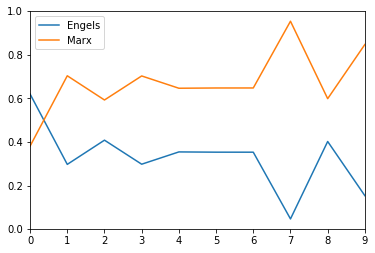

In [35]:
data=[]
engy=[]
marxy=[]
for j in range(len(tracksstop)):
    current=[tracksstop[j]['Engels']['Marx/Engels'],tracksstop[j]['Marx']['Marx/Engels']]
    data.append(current)
    engy.append(tracksstop[j]['Marx'])
    marxy.append(tracksstop[j]['Marx'])
pd.DataFrame(data,columns=["Engels","Marx"]).plot.line()

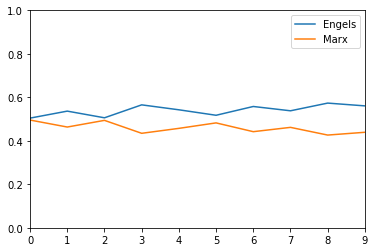

In [36]:
data=[]
engy=[]
marxy=[]
for j in range(len(tracksstop)):
    current=[tracks[j]['Engels']['Marx/Engels'],tracks[j]['Marx']['Marx/Engels']]
    data.append(current)
    engy.append(tracks[j]['Marx'])
    marxy.append(tracks[j]['Marx'])
pd.DataFrame(data,columns=["Engels","Marx"]).plot.line(ylim=[0,1])


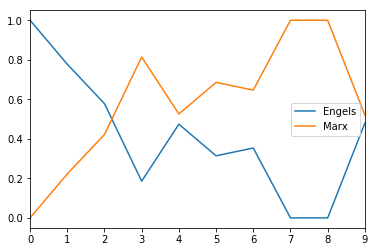

In [37]:
data=[]
engy=[]
marxy=[]
for j in range(len(tracksstop)):
    current=[tracksstop2[j]['Engels']['Marx/Engels'],tracksstop2[j]['Marx']['Marx/Engels']]
    data.append(current)
    engy.append(tracksstop2[j]['Marx'])
    marxy.append(tracksstop2[j]['Marx'])
pd.DataFrame(data,columns=["Engels","Marx"]).plot.line()

In [ ]:
# leave one out t